In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import pandas as pd
import pickle

In [2]:
%%time
may = pd.read_csv('../data/may.csv')
may.head()

Wall time: 21.2 s


,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-05-01 00:01:41.247000,36.136822,-86.799877,PoweredLIRL1,Powered,93.0,scooter,0.0,Bird
1,2019-05-01 00:01:41.247000,36.191252,-86.772945,PoweredXWRWC,Powered,35.0,scooter,0.0,Bird
2,2019-05-01 00:01:41.247000,36.144752,-86.806293,PoweredMEJEH,Powered,90.0,scooter,0.0,Bird
3,2019-05-01 00:01:41.247000,36.162056,-86.774688,Powered1A7TC,Powered,88.0,scooter,0.0,Bird
4,2019-05-01 00:01:41.247000,36.150973,-86.783109,Powered2TYEF,Powered,98.0,scooter,0.0,Bird


In [3]:
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20292503 entries, 0 to 20292502
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   sumdtype     object 
 5   chargelevel  float64
 6   sumdgroup    object 
 7   costpermin   float64
 8   companyname  object 
dtypes: float64(4), object(5)
memory usage: 1.4+ GB


In [4]:
may.companyname.unique()

array(['Bird', 'Lyft', 'Gotcha', 'Lime', 'Spin', 'Jump', 'Bolt'],
      dtype=object)

In [5]:
company_dict = {'Bird':0, 'Lyft': 1, 'Gotcha': 2, 'Lime': 3, 'Spin': 4, 'Jump': 5, 'Bolt': 6}

In [6]:
may.companyname = may.companyname.replace(company_dict)

In [7]:
may.pubdatetime = pd.to_datetime(may.pubdatetime)
may.head(2)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,Powered,93.0,scooter,0.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,Powered,35.0,scooter,0.0,0


In [8]:
may.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [9]:
may_scooters = may.loc[may.sumdgroup.isin(['scooter', 'Scooter'])]

In [10]:
may_scooters = may_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [11]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.1+ GB


In [12]:
may_scooters.to_pickle("../data/may.pkl")

In [13]:
%%time
may_test = pd.read_pickle("../data/may.pkl")

Wall time: 1.56 s


In [14]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import pandas as pd
import pickle

In [15]:
%%time
june = pd.read_csv('../data/june.csv')
june.head()

Wall time: 30.3 s


,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,Powered,90.0,scooter,0.06,Jump
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,Powered,63.0,scooter,0.06,Jump
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,Powered,77.0,scooter,0.06,Jump
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,Powered,0.0,scooter,0.06,Jump
4,2019-06-01 00:00:12,36.1622,-86.7806,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,Powered,2.0,scooter,0.06,Jump


In [16]:
june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28046095 entries, 0 to 28046094
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   sumdtype     object 
 5   chargelevel  float64
 6   sumdgroup    object 
 7   costpermin   float64
 8   companyname  object 
dtypes: float64(4), object(5)
memory usage: 1.9+ GB


In [17]:
june.companyname.unique()

array(['Jump', 'Bird', 'Bolt', 'Gotcha', 'Spin', 'Lime', 'Lyft'],
      dtype=object)

In [18]:
company_dict = {'Bird':0, 'Lyft': 1, 'Gotcha': 2, 'Lime': 3, 'Spin': 4, 'Jump': 5, 'Bolt': 6}

In [19]:
june.companyname = june.companyname.replace(company_dict)

In [20]:
june.pubdatetime = pd.to_datetime(june.pubdatetime)
june.head(2)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,Powered,90.0,scooter,0.06,5
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,Powered,63.0,scooter,0.06,5


In [21]:
june.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [22]:
june_scooters = june.loc[june.sumdgroup.isin(['scooter', 'Scooter'])]

In [23]:
june_scooters = june_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [24]:
june_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28037408 entries, 0 to 28046094
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.5+ GB


In [25]:
june_scooters.to_pickle("../data/june.pkl")

In [26]:
%%time
june_test = pd.read_pickle("../data/june.pkl")

Wall time: 3.11 s


In [27]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import pandas as pd
import pickle

In [28]:
%%time
july = pd.read_csv('../data/july.csv')
july.head()

Wall time: 28.1 s


,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01 00:00:33.550000,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,Lyft
1,2019-07-01 00:00:34.973000,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,Lyft
2,2019-07-01 00:00:41.183000,36.179319,-86.751538,Powered570380,Powered,76.0,scooter,0.15,Lyft
3,2019-07-01 00:00:41.620000,36.152111,-86.803821,Powered240631,Powered,43.0,scooter,0.15,Lyft
4,2019-07-01 00:00:45.087000,36.149355,-86.797550,Powered970404,Powered,52.0,scooter,0.15,Lyft


In [29]:
july.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25075445 entries, 0 to 25075444
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   sumdtype     object 
 5   chargelevel  float64
 6   sumdgroup    object 
 7   costpermin   float64
 8   companyname  object 
dtypes: float64(4), object(5)
memory usage: 1.7+ GB


In [30]:
july.companyname.unique()

array(['Lyft', 'Bird', 'Spin', 'Bolt', 'Jump', 'Lime', 'Gotcha'],
      dtype=object)

In [31]:
company_dict = {'Bird':0, 'Lyft': 1, 'Gotcha': 2, 'Lime': 3, 'Spin': 4, 'Jump': 5, 'Bolt': 6}

In [32]:
july.companyname = july.companyname.replace(company_dict)

In [33]:
july.pubdatetime = pd.to_datetime(july.pubdatetime)
july.head(2)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,1
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,1


In [34]:
july.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [35]:
july_scooters = july.loc[july.sumdgroup.isin(['scooter', 'Scooter'])]

In [36]:
july_scooters = july_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [37]:
july_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25066524 entries, 0 to 25075444
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.3+ GB


In [38]:
july_scooters.to_pickle("../data/july.pkl")

In [39]:
%%time
july_test = pd.read_pickle("../data/july.pkl")

Wall time: 3.1 s


In [40]:
may_test = pd.read_pickle("../data/may.pkl")

In [41]:
may_test.head(10)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0
5,2019-05-01 00:01:41.247,36.157188,-86.769978,Powered3F3VK,82.0,0
6,2019-05-01 00:01:41.247,36.154348,-86.784765,PoweredVL7YG,56.0,0
7,2019-05-01 00:01:41.247,36.158930,-86.775987,Powered5LNUG,100.0,0
8,2019-05-01 00:01:41.247,36.135993,-86.804226,Powered7SPQQ,85.0,0
9,2019-05-01 00:01:41.247,36.148938,-86.811256,PoweredBV1DT,65.0,0


In [42]:
may_test.shape

(20283582, 6)

In [43]:
june_test.head(10)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,5
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,5
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,5
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,5
4,2019-06-01 00:00:12,36.1622,-86.7806,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,5
5,2019-06-01 00:00:12,36.1554,-86.7808,Powered9e113e9f-0ac7-5b22-b6f6-16c246237b65,8.0,5
6,2019-06-01 00:00:12,36.1582,-86.7888,Powered9579bea8-8ee5-56d2-bc52-96715fbbc077,19.0,5
7,2019-06-01 00:00:12,36.1447,-86.8132,Powered402430bc-118f-5da7-bc77-e577b39ba4ac,84.0,5
8,2019-06-01 00:00:12,36.1432,-86.8146,Powered93f29f0e-5a4c-5ac2-9f2c-a9770ef63d07,67.0,5
9,2019-06-01 00:00:12,36.1433,-86.7917,Poweredf3505c0d-b541-577a-af33-caa49b6d577c,60.0,5


In [44]:
june_test.shape

(28037408, 6)

In [45]:
july_test.head(10)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,1
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,33.0,1
2,2019-07-01 00:00:41.183,36.179319,-86.751538,Powered570380,76.0,1
3,2019-07-01 00:00:41.620,36.152111,-86.803821,Powered240631,43.0,1
4,2019-07-01 00:00:45.087,36.149355,-86.797550,Powered970404,52.0,1
5,2019-07-01 00:00:46.847,36.168153,-86.777374,Powered912425,80.0,1
6,2019-07-01 00:00:50.500,36.143266,-86.809886,Powered667919,60.0,1
7,2019-07-01 00:00:50.520,36.177355,-86.750667,Powered523737,85.0,1
8,2019-07-01 00:00:53.273,36.158546,-86.774062,Powered689152,72.0,1
9,2019-07-01 00:00:56.293,36.177708,-86.750043,Powered211807,99.0,1


In [46]:
july_test.shape

(25066524, 6)

In [47]:
may_test.tail(10)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
20292493,2019-05-31 23:58:27.243,36.122375,-86.775722,PoweredHICJ5XYHBAW5I,60.0,3
20292494,2019-05-31 23:58:27.243,36.121613,-86.775351,PoweredXZH7USFBU76DX,94.0,3
20292495,2019-05-31 23:58:27.243,36.120440,-86.777199,PoweredSZAWEG5FWAI6V,56.0,3
20292496,2019-05-31 23:58:27.243,36.121584,-86.775493,PoweredU6FP6ZXZ6JRTC,94.0,3
20292497,2019-05-31 23:58:43.000,36.147400,-86.811700,Poweredf0c59838-3392-5ea9-9a8f-d680bc8ac344,71.0,5
20292498,2019-05-31 23:59:42.000,36.163900,-86.782300,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,5
20292499,2019-05-31 23:59:42.000,36.160600,-86.776800,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,5
20292500,2019-05-31 23:59:42.000,36.160600,-86.776900,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,5
20292501,2019-05-31 23:59:42.000,36.162400,-86.774500,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,5
20292502,2019-05-31 23:59:42.000,36.151900,-86.798500,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,5


In [48]:
june_test.tail(10)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
28046085,2019-06-30 23:59:55.273,36.123596,-86.775587,PoweredTC2NFR6OUH7R6,85.0,3
28046086,2019-06-30 23:59:55.273,36.126259,-86.789254,PoweredEG3HFFLMFCZ5W,5.0,3
28046087,2019-06-30 23:59:55.273,36.121652,-86.775156,PoweredYTL5TFGVWXDQC,100.0,3
28046088,2019-06-30 23:59:55.273,36.124795,-86.789156,PoweredBKKI2SJSMUYX5,74.0,3
28046089,2019-06-30 23:59:55.273,36.127004,-86.781905,PoweredSDQ6GAHIJK5AF,45.0,3
28046090,2019-06-30 23:59:55.273,36.125567,-86.776982,PoweredZYNSVOII2QSLD,100.0,3
28046091,2019-06-30 23:59:55.273,36.121717,-86.775207,PoweredXOPAIWGL7SF62,93.0,3
28046092,2019-06-30 23:59:55.273,36.127046,-86.777262,PoweredBYKFOWELGPKH6,61.0,3
28046093,2019-06-30 23:59:55.273,36.123775,-86.790115,PoweredIAAQ7WODYXON7,35.0,3
28046094,2019-06-30 23:59:55.273,36.121735,-86.775148,Powered3HJPPUNVYGL45,96.0,3


In [49]:
july_test.tail(10)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
25075435,2019-07-31 23:59:57,36.145317,-86.805716,Powered-ca852284-237e-c8f1-ba02-fb03f5bdba50,68.28,6
25075436,2019-07-31 23:59:57,36.164357,-86.769307,Powered-52aafe89-a695-dfd2-1859-d14bc075d1b8,100.00,6
25075437,2019-07-31 23:59:57,36.155166,-86.785101,Powered-0479bb84-afbd-0426-f1c4-df628542a88c,70.26,6
25075438,2019-07-31 23:59:57,36.162440,-86.779279,Powered-0ef64718-9c36-353e-8bf0-39719364d924,100.00,6
25075439,2019-07-31 23:59:57,36.160076,-86.776584,Powered-5c1491f3-3fd5-33cc-40b2-cae70b295346,81.33,6
25075440,2019-07-31 23:59:57,36.162420,-86.779314,Powered-1a8321d0-5c21-04a4-bd7d-7b96ba51f17b,100.00,6
25075441,2019-07-31 23:59:57,36.146010,-86.810197,Powered-bd4ba83b-513f-ed5c-3c51-b4f51e7fdc51,100.00,6
25075442,2019-07-31 23:59:57,36.165837,-86.777765,Powered-cc9c0b7e-2b9e-def9-e48b-1a8a489c4daf,71.68,6
25075443,2019-07-31 23:59:57,36.149792,-86.806818,Powered-55a7ac02-7e17-bb3b-130d-b160d9776405,0.00,6
25075444,2019-07-31 23:59:57,36.162644,-86.779345,Powered-03be23ca-d43b-222f-be54-e44b5b4690df,100.00,6


In [58]:
may_n_scooters = int(may.sumdid.nunique())
may_n_scooters

8304

In [59]:
june_n_scooters = int(june.sumdid.nunique())
june_n_scooters

7828

In [60]:
july_n_scooters = int(july.sumdid.nunique())
july_n_scooters

6788

In [51]:
may.companyname.value_counts()

3    7120576
0    4334006
1    3112581
5    2984630
4    1301001
2     915314
6     524395
Name: companyname, dtype: int64

In [53]:
june.companyname.value_counts()

5    8482893
3    6161191
0    4215302
1    3084229
4    2507991
2    1830453
6    1764036
Name: companyname, dtype: int64

In [54]:
july.companyname.value_counts()

5    10367575
0     3702282
3     3242494
1     2890233
2     1933513
4     1750581
6     1188767
Name: companyname, dtype: int64

Index(['companyname'], dtype='object')


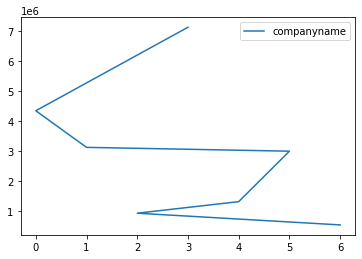

In [55]:
may_cn_vals = may.companyname.value_counts()
may_cn_vals = pd.DataFrame(may_cn_vals)
print(may_cn_vals.columns)
may_cn_vals.sort_values("companyname")
may_cn_vals.plot();

Index(['companyname'], dtype='object')


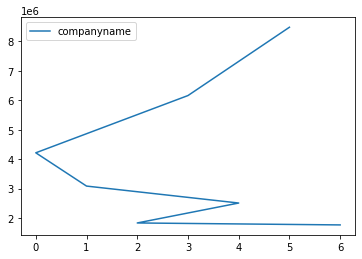

In [56]:
june_cn_vals = june.companyname.value_counts()
june_cn_vals = pd.DataFrame(june_cn_vals)
print(june_cn_vals.columns)
june_cn_vals.sort_values("companyname")
june_cn_vals.plot();

Index(['companyname'], dtype='object')


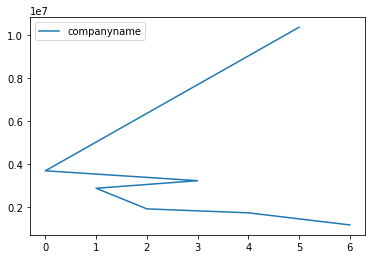

In [57]:
july_cn_vals = july.companyname.value_counts()
july_cn_vals = pd.DataFrame(july_cn_vals)
print(july_cn_vals.columns)
july_cn_vals.sort_values("companyname")
july_cn_vals.plot();

In [61]:
may_test.head(10)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0
5,2019-05-01 00:01:41.247,36.157188,-86.769978,Powered3F3VK,82.0,0
6,2019-05-01 00:01:41.247,36.154348,-86.784765,PoweredVL7YG,56.0,0
7,2019-05-01 00:01:41.247,36.158930,-86.775987,Powered5LNUG,100.0,0
8,2019-05-01 00:01:41.247,36.135993,-86.804226,Powered7SPQQ,85.0,0
9,2019-05-01 00:01:41.247,36.148938,-86.811256,PoweredBV1DT,65.0,0


In [62]:
may_test.describe()

,latitude,longitude,chargelevel,companyname
count,2.028358e+07,2.028358e+07,2.028330e+07,2.028358e+07
mean,3.614047e+01,-8.675242e+01,6.590530e+01,2.442946e+00
std,6.193919e-01,1.486410e+00,3.041610e+01,1.776813e+00
min,0.000000e+00,-8.728604e+01,0.000000e+00,0.000000e+00
25%,3.614305e+01,-8.679267e+01,4.700000e+01,1.000000e+00
50%,3.615411e+01,-8.678090e+01,7.200000e+01,3.000000e+00
75%,3.616320e+01,-8.677170e+01,9.300000e+01,3.000000e+00
max,3.661670e+01,0.000000e+00,1.000000e+02,6.000000e+00


In [63]:
may_test["companyname"].value_counts()

3    7111655
0    4334006
1    3112581
5    2984630
4    1301001
2     915314
6     524395
Name: companyname, dtype: int64

In [64]:
company_dict = {0:'Bird', 1:'Lyft', 2: 'Gotcha', 3:'Lime', 4: 'Spin', 5: 'Jump', 6: 'Bolt'}
may.companyname = may.companyname.replace(company_dict)
june.companyname = june.companyname.replace(company_dict)
july.companyname = july.companyname.replace(company_dict)

In [66]:
may_test.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [67]:
may.companyname.value_counts()

Lime      7120576
Bird      4334006
Lyft      3112581
Jump      2984630
Spin      1301001
Gotcha     915314
Bolt       524395
Name: companyname, dtype: int64

In [68]:
may.sumdid.value_counts()

StandardNW5HJFO4R32LY    8921
PoweredIE7H5RIN474PE     8921
PoweredUK65LOU3K5N7G     8748
PoweredIOHG2G3XKATUL     8576
PoweredJCKMQCAL2SSNJ     8521
                         ... 
Powered1PKP7                1
PoweredN4YI2A7RXZQLY        1
Powered3361332              1
Powered523737               1
PoweredCI6VKIK2KOFMC        1
Name: sumdid, Length: 8304, dtype: int64

In [69]:
may.sumdid.values

array(['PoweredLIRL1', 'PoweredXWRWC', 'PoweredMEJEH', ...,
       'Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc',
       'Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c',
       'Powered8505008e-97c9-5003-8975-2ea6b2634fa0'], dtype=object)

Text(0.5, 1.0, 'Companies in May')

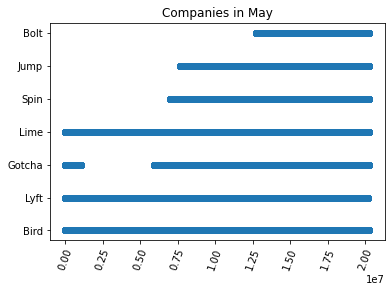

In [73]:
plt.plot('companyname', marker= 'o', linestyle='none', data=may)
plt.xticks(rotation=70)
plt.title("Companies in May")